In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import LabelBinarizer

import tensorflow as tf

import numpy as np
import pandas as pd
from PIL import Image

import gc

from skimage import feature

In [33]:
# a = np.array(Image.open('../input/photos/A.jpg').convert('L'))
# b = np.array(Image.open('../input/photos/B.jpg').convert('L'))
# c = np.array(Image.open('../input/photos/C.jpg').convert('L'))
# d = np.array(Image.open('../input/photos/D.jpg').convert('L'))

# edge_a = feature.canny(a, sigma=1.5)
# edge_b = feature.canny(b, sigma=1.5)
# edge_c = feature.canny(c, sigma=1.5)
# edge_d = feature.canny(d, sigma=1.5)

# # plt.imshow(edge_a)
# # plt.imshow(edge_b)
# # plt.imshow(edge_c)
# plt.imshow(edge_d)

In [34]:
# a_2 = np.array(Image.open('../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/A/A10.jpg').convert('L'))
# b_2 = np.array(Image.open('../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/B/B10.jpg').convert('L'))
# c_2 = np.array(Image.open('../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/C/C10.jpg').convert('L'))


# edge_a_2 = feature.canny(a_2, sigma=1.5)
# edge_b_2 = feature.canny(b_2, sigma=1.5)
# edge_c_2 = feature.canny(c_2, sigma=1.5)

# # plt.imshow(edge_a_2)
# # plt.imshow(edge_b_2)
# plt.imshow(edge_c_2)


In [35]:
df = pd.DataFrame(columns=["source", "goal", "goal_encoded"])



for dirname, _, filenames in os.walk('../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train'):
    for filename in filenames:
        df = df.append({
            'source': os.path.join(dirname, filename),
            "goal": dirname[dirname.rfind('/') + 1:],
        }, ignore_index=True)

encoder = LabelBinarizer()
goal_encoded = encoder.fit_transform(df["goal"].tolist())

df["goal_encoded"] = goal_encoded.tolist()

In [36]:
df = df.sample(frac=1).reset_index()

In [37]:
train = df.iloc[:85000]
test = df.iloc[85000:87000]

In [38]:
dataGenerator = ImageDataGenerator(validation_split=0.01)

train_data = dataGenerator.flow_from_dataframe(
    train, x_col="source", y_col="goal",target_size=(200, 200),
    class_mode='categorical', batch_size=32, shuffle=True, subset="training"
)

validation_data = dataGenerator.flow_from_dataframe(
    train, x_col="source", y_col="goal",target_size=(200, 200),
    class_mode='categorical', batch_size=32, shuffle=True, subset="validation"
)

Found 84150 validated image filenames belonging to 29 classes.
Found 850 validated image filenames belonging to 29 classes.


In [39]:
'''
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu', input_shape = (200,200,3)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 512, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 512, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 512, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 512, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 512, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 512, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation = "relu"))
model.add(Dense(4096, activation = "relu"))
model.add(Dense(len(df["goal"].unique()), activation = "softmax"))

model.summary()
'''

'\nmodel = Sequential()\n\nmodel.add(Conv2D(filters = 64, kernel_size = (3,3),padding = \'Same\', activation =\'relu\', input_shape = (200,200,3)))\nmodel.add(Conv2D(filters = 64, kernel_size = (3,3),padding = \'Same\', activation =\'relu\'))\nmodel.add(MaxPool2D(pool_size=(2,2)))\n\n\nmodel.add(Conv2D(filters = 128, kernel_size = (3,3),padding = \'Same\', activation =\'relu\'))\nmodel.add(Conv2D(filters = 128, kernel_size = (3,3),padding = \'Same\', activation =\'relu\'))\nmodel.add(MaxPool2D(pool_size=(2,2)))\n\n\nmodel.add(Conv2D(filters = 256, kernel_size = (3,3),padding = \'Same\', activation =\'relu\'))\nmodel.add(Conv2D(filters = 256, kernel_size = (3,3),padding = \'Same\', activation =\'relu\'))\nmodel.add(Conv2D(filters = 256, kernel_size = (3,3),padding = \'Same\', activation =\'relu\'))\nmodel.add(MaxPool2D(pool_size=(2,2)))\n\nmodel.add(Conv2D(filters = 512, kernel_size = (3,3),padding = \'Same\', activation =\'relu\'))\nmodel.add(Conv2D(filters = 512, kernel_size = (3,3),p

In [40]:
from keras.applications import MobileNetV2

model = MobileNetV2(weights = "imagenet", input_shape = (200,200,3), pooling = "avg", include_top=False)
inputs = model.input

x = Dense(128, activation='relu')(model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(len(df["goal"].unique()), activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

9412608/9406464 [==============================] - 0s 0us/step


In [41]:
optimizer = RMSprop(lr=1e-05, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [42]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [43]:
epochs = 5

history = model.fit(train_data, 
                        epochs = epochs, validation_data = validation_data,
                        verbose = 2, callbacks=[learning_rate_reduction])

Epoch 1/5
2630/2630 - 679s - loss: 0.8379 - accuracy: 0.8224 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 2/5
2630/2630 - 348s - loss: 0.0070 - accuracy: 0.9988 - val_loss: 5.3956e-04 - val_accuracy: 1.0000
Epoch 3/5
2630/2630 - 349s - loss: 0.0011 - accuracy: 0.9998 - val_loss: 4.7916e-05 - val_accuracy: 1.0000
Epoch 4/5
2630/2630 - 349s - loss: 5.1140e-04 - accuracy: 0.9998 - val_loss: 4.5562e-06 - val_accuracy: 1.0000
Epoch 5/5
2630/2630 - 349s - loss: 1.4684e-04 - accuracy: 1.0000 - val_loss: 1.1260e-06 - val_accuracy: 1.0000


In [44]:
dataGenerator = ImageDataGenerator()

test_data = dataGenerator.flow_from_dataframe(
    test, x_col="source", y_col="goal",target_size=(200, 200),
    class_mode='categorical', shuffle = False)

Found 2000 validated image filenames belonging to 29 classes.


In [45]:
results = model.predict(test_data)
results = encoder.inverse_transform(results)

results

array(['E', 'O', 'F', ..., 'Y', 'T', 'B'], dtype='<U7')

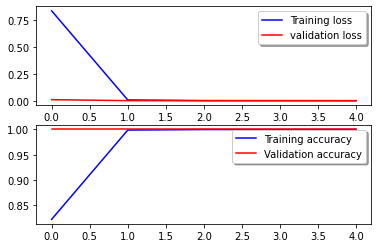

In [46]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

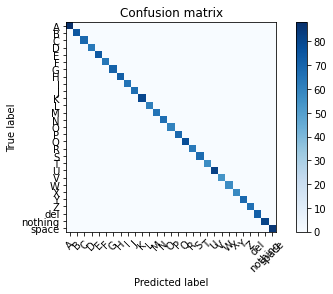

In [47]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


confusion_mtx = confusion_matrix(test["goal"], results)

confusion_mtx

plot_confusion_matrix(confusion_mtx, classes = np.unique(test["goal"]))

array(['K'], dtype='<U7')

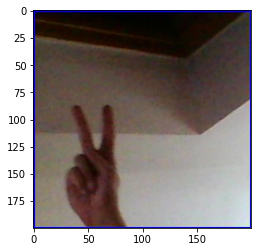

In [48]:
plt.imshow(np.array(Image.open(test.iloc[187]["source"])))

res = model.predict(np.array([np.array(Image.open(test.iloc[187]["source"]))]))
label = encoder.inverse_transform(res)
label

In [78]:
testImages = pd.DataFrame(columns=["image", "file", "predicted"])

# asl-alphabet/asl_alphabet_test/asl_alphabet_test
# '../input/PhotosForASL'

for dirname, _, filenames in os.walk('../input/hand-only-data'):
    for filename in filenames:
        testImages = testImages.append({
            'image': np.array(Image.open(os.path.join(dirname, filename))),
            "file": filename,
        }, ignore_index=True)
        

In [79]:
testImageList = []
for i in testImages["image"].to_numpy():
    testImageList.append(i)
    
    
testImageList = np.array(testImageList)

In [80]:
# testImageList

In [81]:
test_results = model.predict(testImageList)

test_results = encoder.inverse_transform(test_results)

testImages["predicted"] = test_results

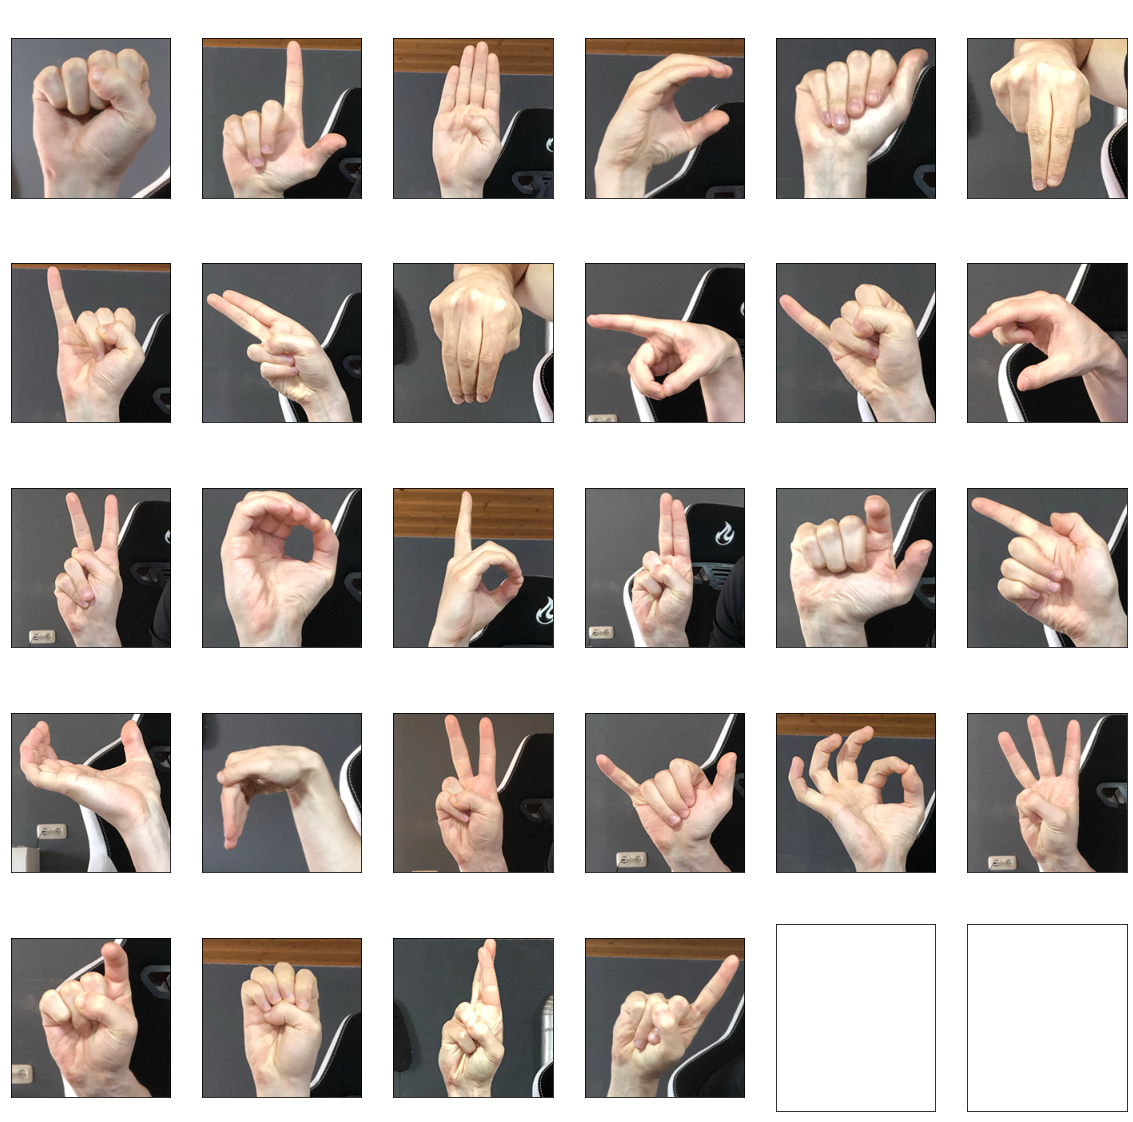

In [82]:
fig, ax = plt.subplots(5,6, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})
for i in range(0, len(testImages)):
    ax[i // 6][i % 6].imshow(testImages.iloc[i]["image"])
    ax[i // 6][i % 6].set_title(f"File: {testImages.iloc[i]['file']}\nPredicted: {testImages.iloc[i]['predicted']}", color= "white")